# Micro Credit Project

INTRODUCTION

The data is about Micro Finance Loans given to Telecom Industry Customers.
We have total 37 columns and 2,09,593 rows with no null values.
Label Column refers to Target Variable, Where we have non - defaulters with 0 and defaulters with 1.
Based on the given data and Target Variable, we are performing classification model.


HISTORY OF MICRO FINANCE

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations.
The Microfinance services (MFS) becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income.
The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.


MACHINE LEARNING IN MICRO FINANCE

Machine learning is the study of computer algorithms that improve automatically through experience and by the use of data.
Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions
Machine Learning in Micro Finance helps in order to improve the selection of customers for the credit
Machine Learning helps in reducing defaulters and helps in finding the right customer


PROBLEM STATEMENT

Building a model, which can be used to predict in terms of a probability for each loan transaction.
Whether the customer will be paying back the loaned amount within 5 days of insurance of loan.
Label ‘1’ indicates that the loan has been paid i.e. Non- defaulter.
Label ‘0’ indicates that the loan has not been paid i.e. defaulter.



# Prepocessing

Importing the Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings

warnings.filterwarnings("ignore")

Loading the dataset

In [2]:
#Loading data set
df=pd.read_csv('Micro_Credit.csv')

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [4]:
df.shape

(209593, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# Null Treatment

In [6]:
def null_treated (df, threshold=30):
    import pandas as pd
    import numpy as np
    '''This function is to perform null value treatment on given data using given threshold'''
    
    #Identifying percentage of null values
    null_value_treatment=(df.isna().sum()/df.shape[0])*100
    print(null_value_treatment)
    
    #Threshold for null treatment. If user doesn't pass any value, default is 30%
    null_values_threshold = threshold
    
    # Dropping columns based on threshold
    dropped_columns=null_value_treatment[null_value_treatment>null_values_threshold].index
    print('Dropped Columns:\n', dropped_columns)
    
    # Retained columns based on threashold
    retained_columns=null_value_treatment[null_value_treatment<null_values_threshold].index
    print('Retained Columns:\n', retained_columns)
    
    #Numerical columns
    numerical_columns=df[retained_columns].describe().columns
    print('Numerical Columns:\n', numerical_columns)
    
    # Charecter Columns
    char_columns=df[retained_columns].describe(include='object').columns
    print('Charecter Columns:\n', char_columns)
    
    print('Length of retained columns: ', len(retained_columns))
    print('Length of dropped columns: ', len(dropped_columns))
    print('Length of numerical columns: ', len(numerical_columns))
    print('Length of charecter columns: ', len(char_columns))
    
    # Making all the values as pandas table
    table_information_numerical=[]
    for i in df[numerical_columns]:
        table_information_numerical.append([i,df[i].nunique()])
    table_information_char=[]
    for i in df[char_columns]:
        table_information_char.append([i,df[i].nunique()])
    
    table_information_numerical=pd.DataFrame(table_information_numerical)
    table_information_char=pd.DataFrame(table_information_char)

    
    # Sperarating numerical continuous columns
    numerical_cont=table_information_numerical[table_information_numerical[1]>33][0].values
    print('Total numerical continuous columns: ', len(numerical_cont))
    print(numerical_cont)
    
    # Separating numerical class columns
    numerical_class=table_information_numerical[table_information_numerical[1]<=33][0].values
    print('Total numerical class columns: ', len(numerical_class))
    print(numerical_class)
    
    # Filling null values for retained columns
    df.drop(dropped_columns,axis=1,inplace=True)
    for i in char_columns:
        df[i].fillna(df[i].mode().values[0],inplace=True)
    for i in numerical_cont:
        df[i].fillna(df[i].median(),inplace=True)
    for i in numerical_class:
        df[i].fillna(df[i].mode().values[0],inplace=True)
        
    print("Null columns after treatment: ", df.isna().sum().sum())
    
    return df, numerical_cont, numerical_class, char_columns




In [7]:
null_treated(df)

Unnamed: 0              0.0
label                   0.0
msisdn                  0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
pcircle             

(        Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
 0                1      0  21408I70789   272.0   3055.050000   3065.150000   
 1                2      1  76462I70374   712.0  12122.000000  12124.750000   
 2                3      1  17943I70372   535.0   1398.000000   1398.000000   
 3                4      1  55773I70781   241.0     21.228000     21.228000   
 4                5      1  03813I82730   947.0    150.619333    150.619333   
 ...            ...    ...          ...     ...           ...           ...   
 209588      209589      1  22758I85348   404.0    151.872333    151.872333   
 209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
 209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
 209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
 209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   
 
         rental30  rental90  last_rech_date_ma  la

No null values found

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [11]:
df.apply(lambda x : len(x.unique())) 

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [12]:
df = df.drop(columns='Unnamed: 0') # Not contributing much to the data set so dropping this column

In [13]:
for i in df.columns:
    print('column Name  :          ',i)
    print(df[i].value_counts())

column Name  :           label
1    183431
0     26162
Name: label, dtype: int64
column Name  :           msisdn
04581I85330    7
47819I90840    7
87592I84456    6
42825I88688    6
43430I70786    6
              ..
37455I82731    1
68900I95202    1
53032I95203    1
49983I91197    1
80124I89238    1
Name: msisdn, Length: 186243, dtype: int64
column Name  :           aon
95.0000        392
92.0000        362
96.0000        357
99.0000        356
157.0000       349
              ... 
832037.7123      1
932056.6019      1
890451.7726      1
670233.0281      1
919992.9709      1
Name: aon, Length: 4507, dtype: int64
column Name  :           daily_decr30
0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
2074.366667        1
3210.520000        1
10279.402670       1
94.225000          1
3265.066667        1
Name: daily_decr30, Length: 146328, dtype: int64
column Name  :           daily_decr90
0.00        4063
500.00  

# EDA

Univariant Analysis

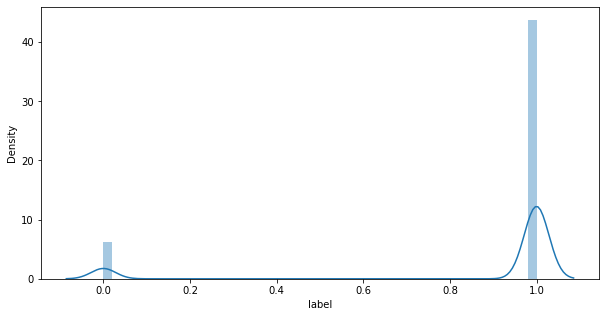

<Figure size 720x360 with 0 Axes>

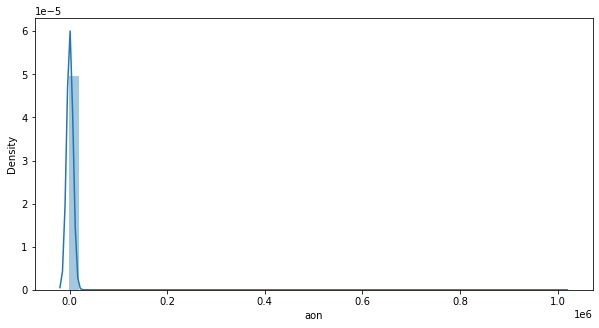

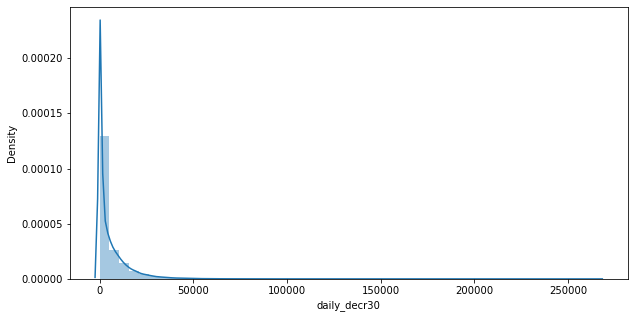

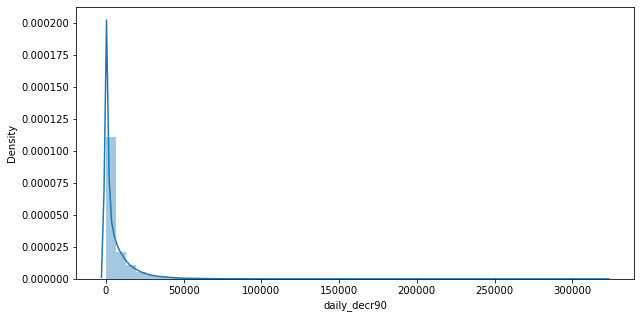

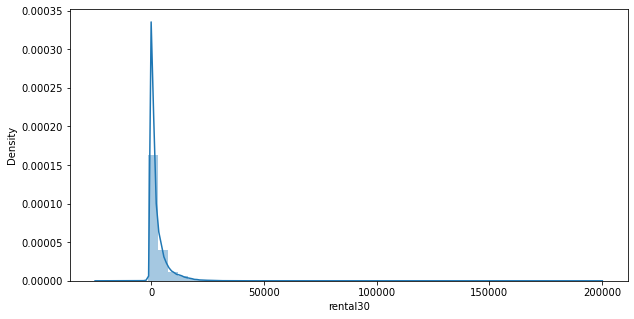

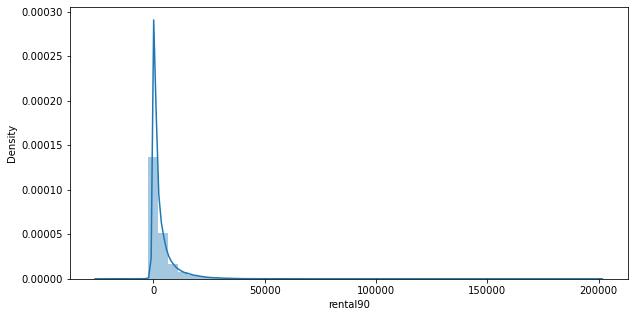

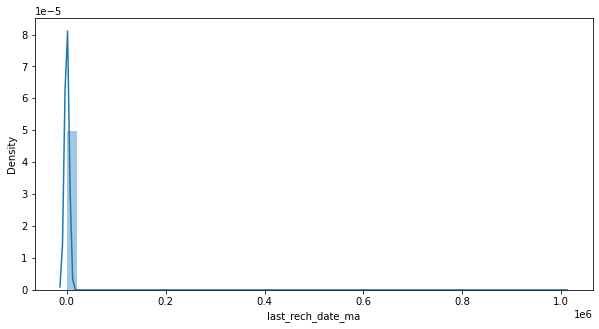

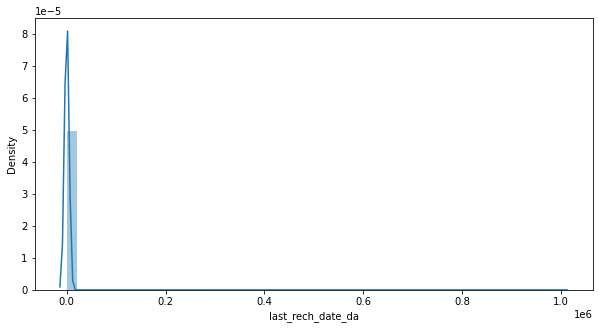

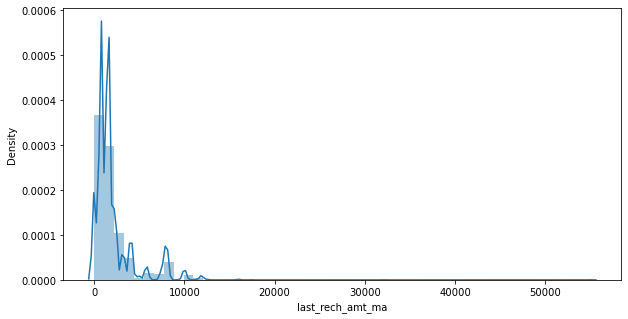

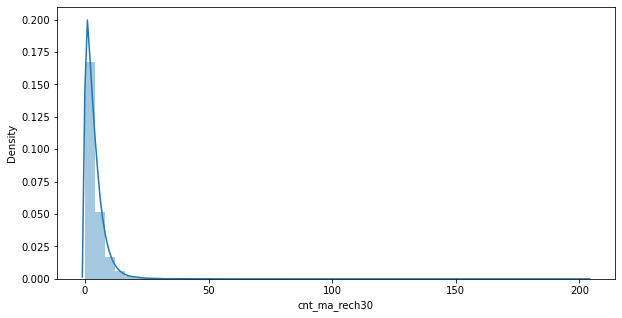

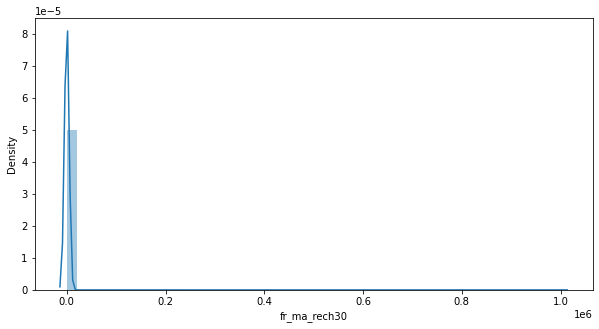

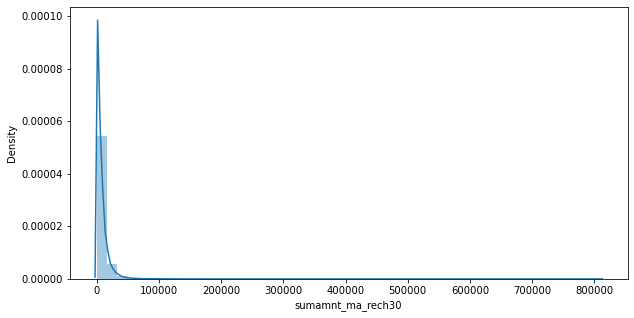

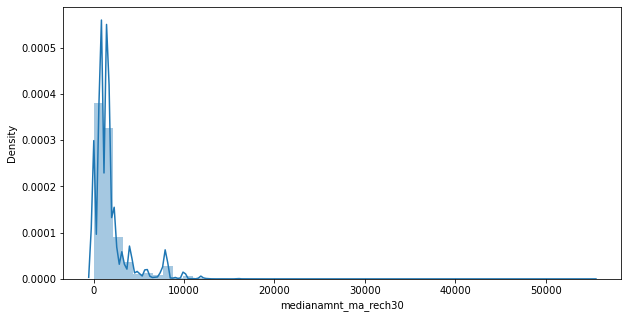

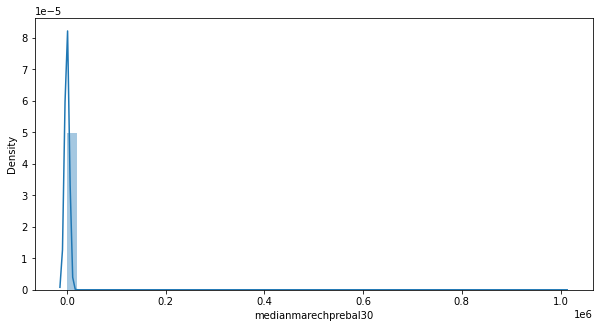

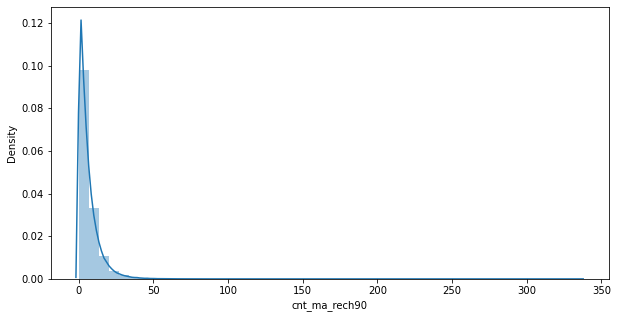

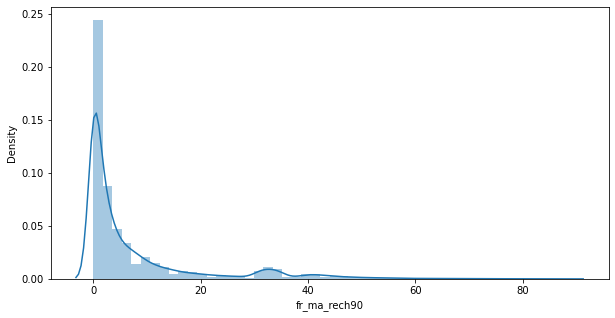

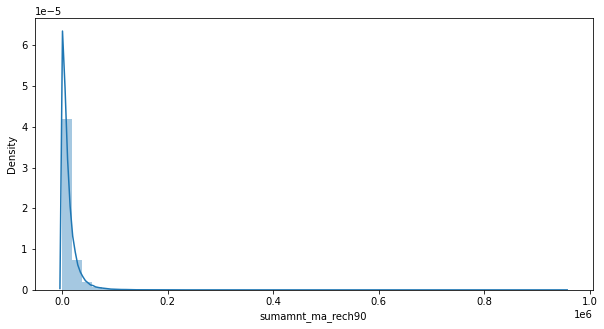

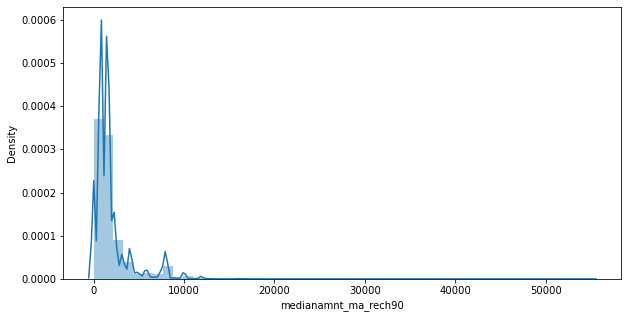

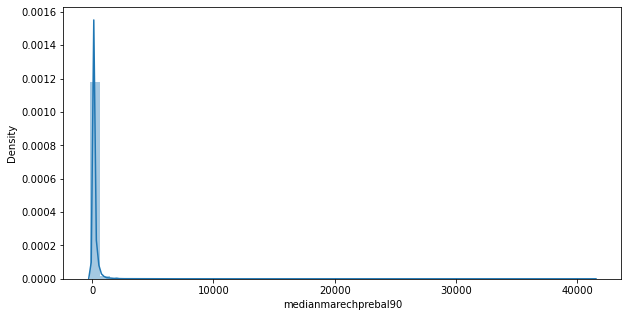

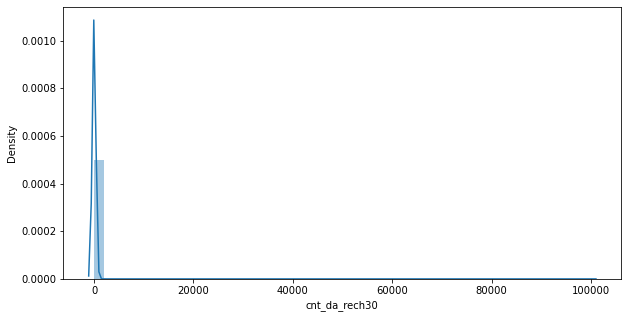

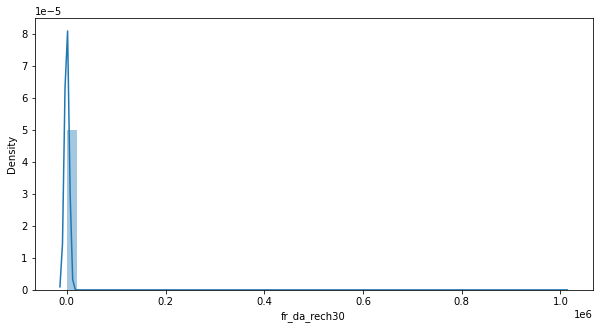

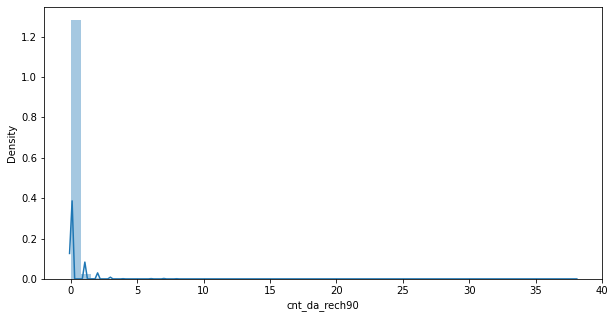

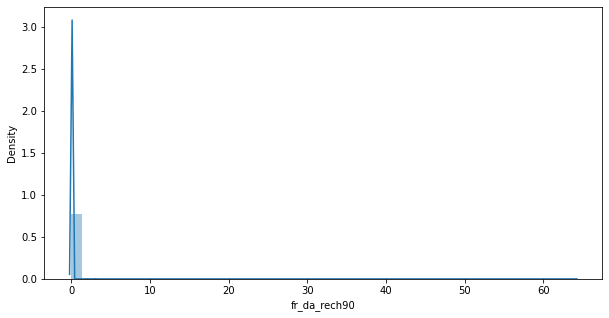

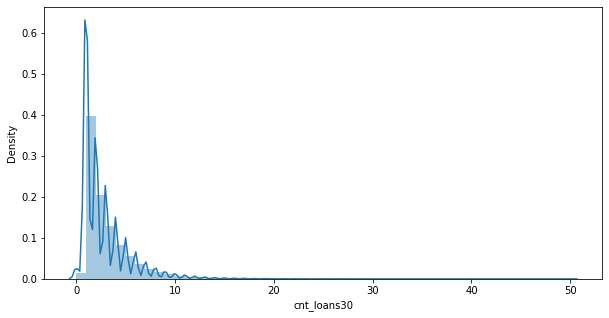

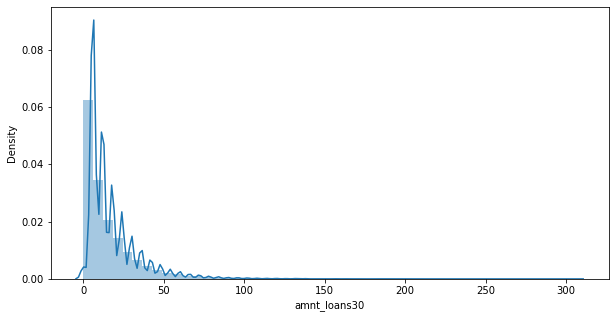

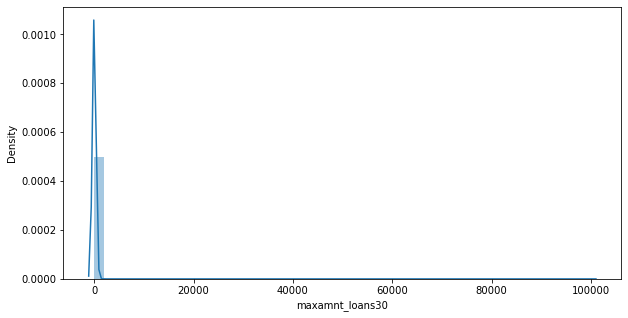

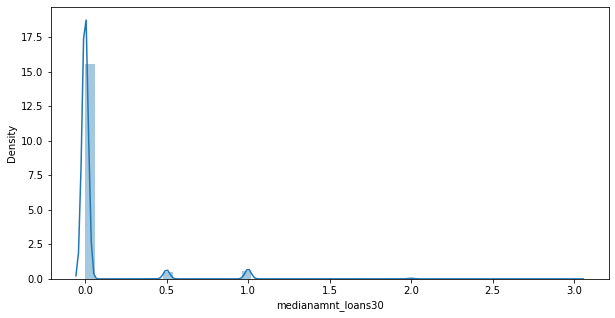

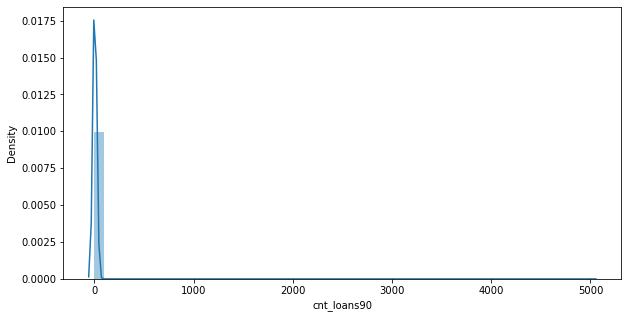

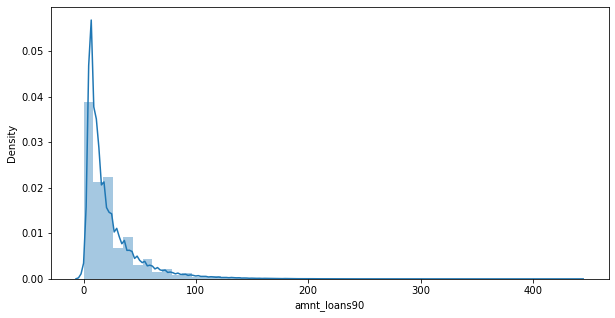

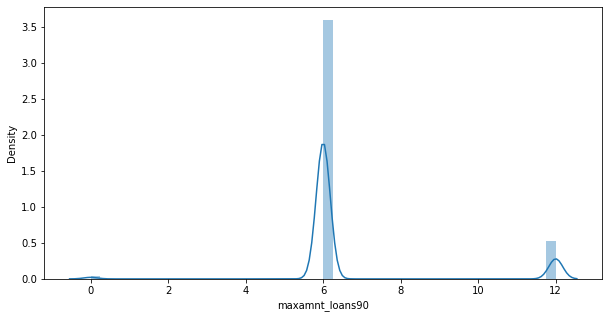

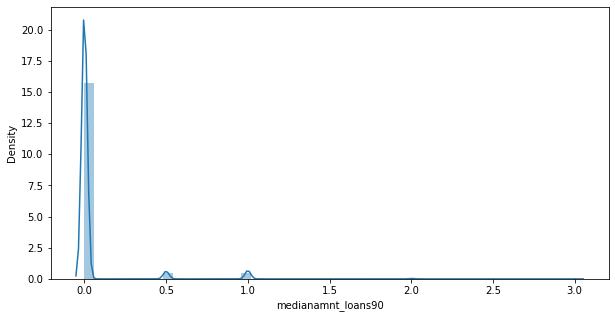

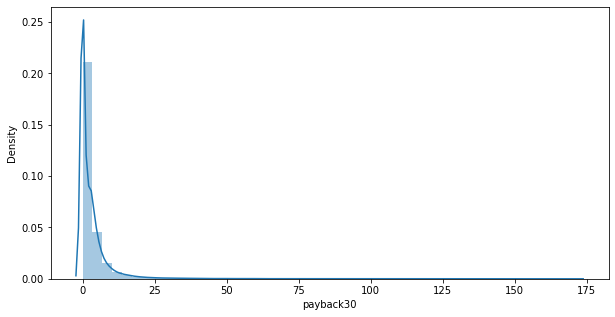

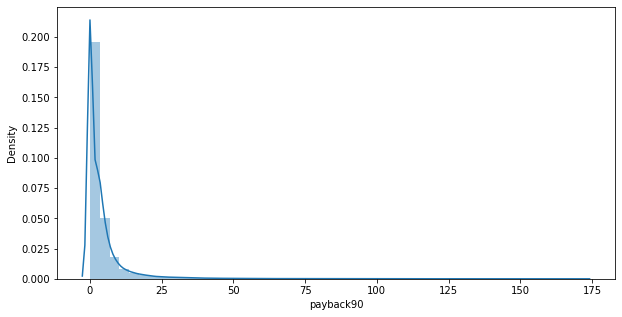

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [14]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    if(df[i].dtype != 'object') :
        sns.distplot(df[i])
        plt.xlabel(i)

label : 87.5% of data shows label 1 , 12.48% of data shows label 0 

Bivariant Analysis

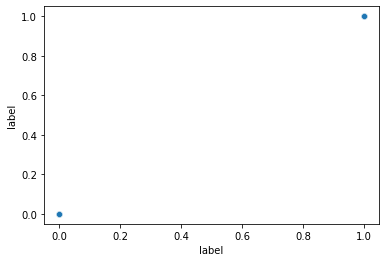

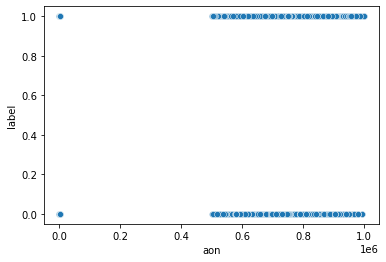

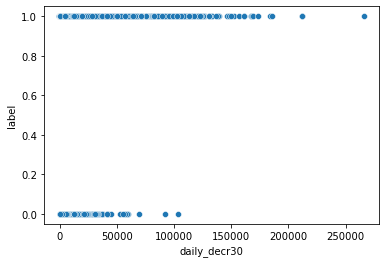

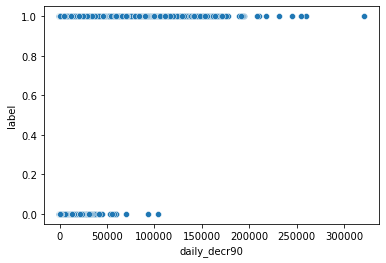

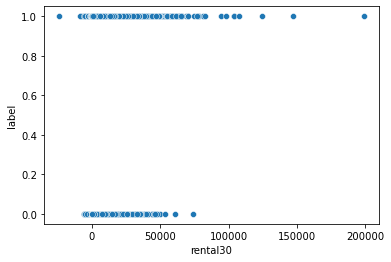

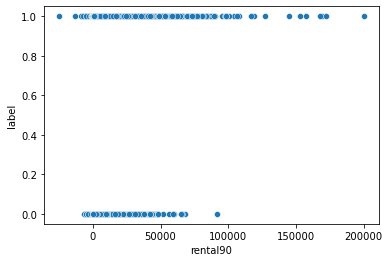

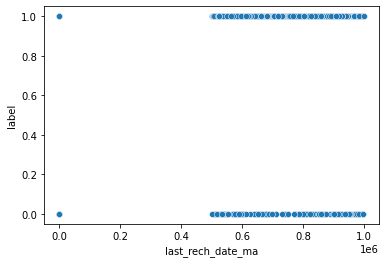

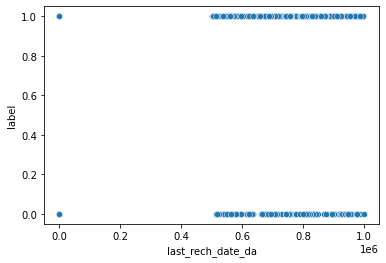

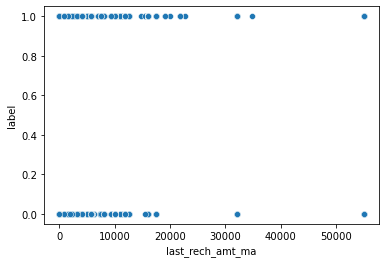

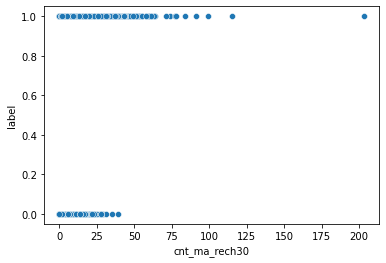

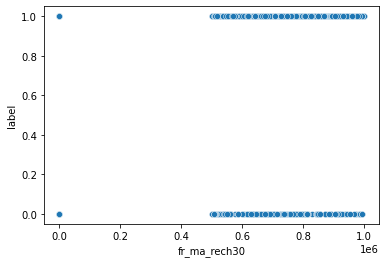

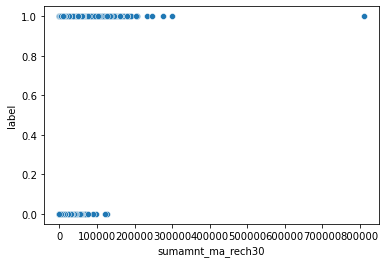

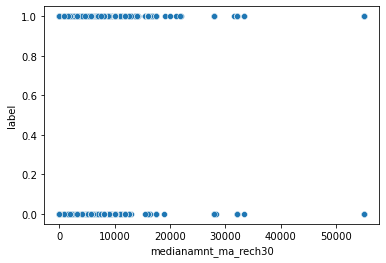

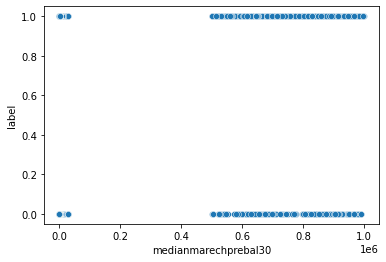

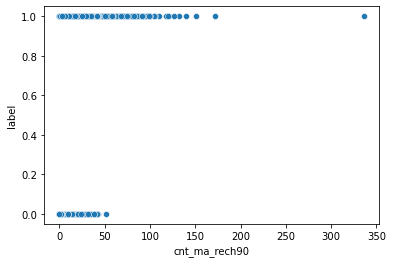

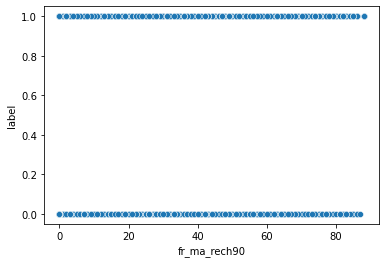

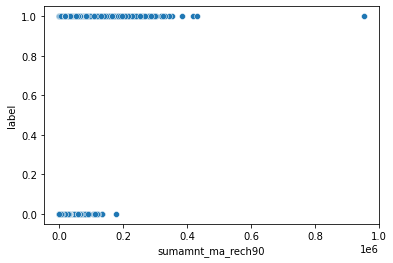

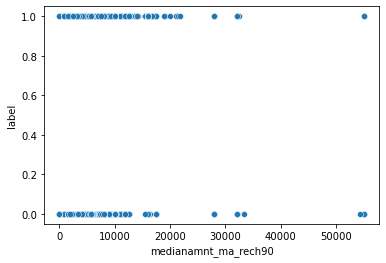

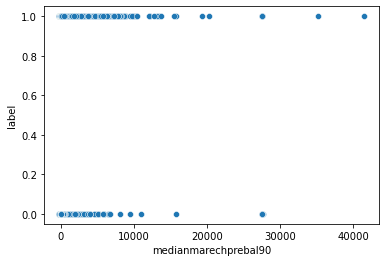

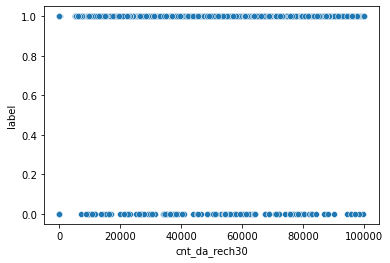

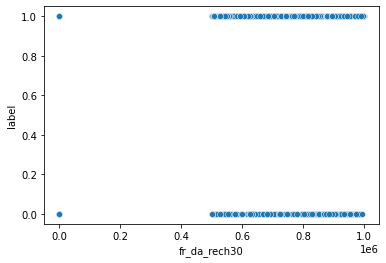

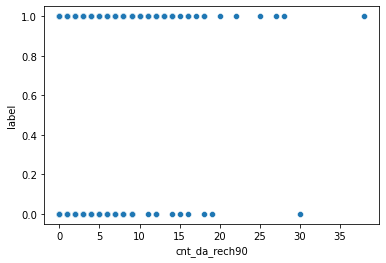

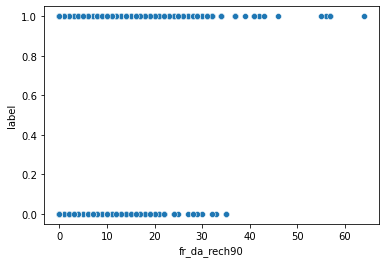

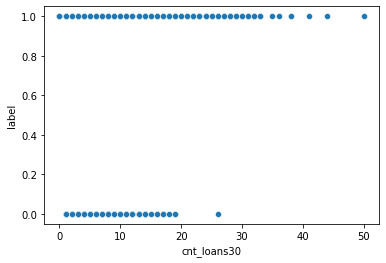

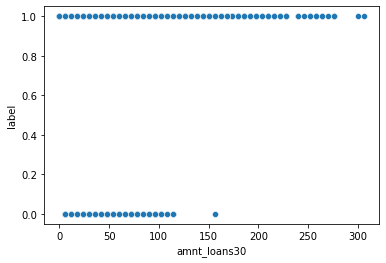

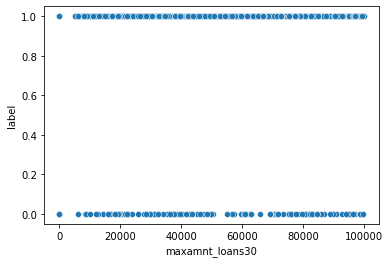

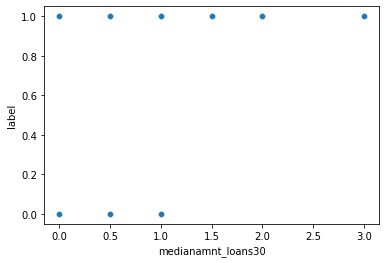

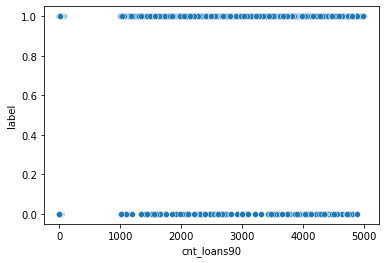

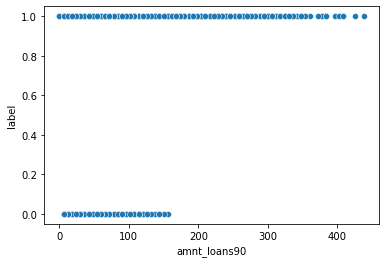

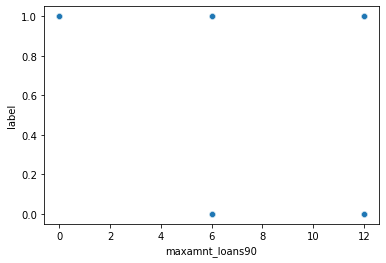

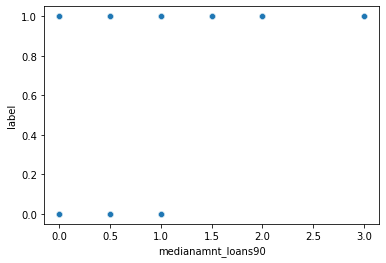

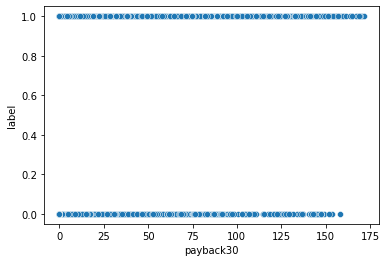

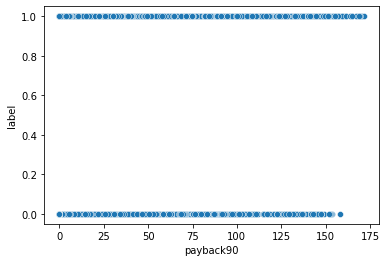

In [15]:
for i in df.columns:
     if(df[i].dtype != 'object') :
            sns.scatterplot(x=df[i], y='label', data=df)
        
            plt.show()
            


Multi variant Analysis

In [16]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


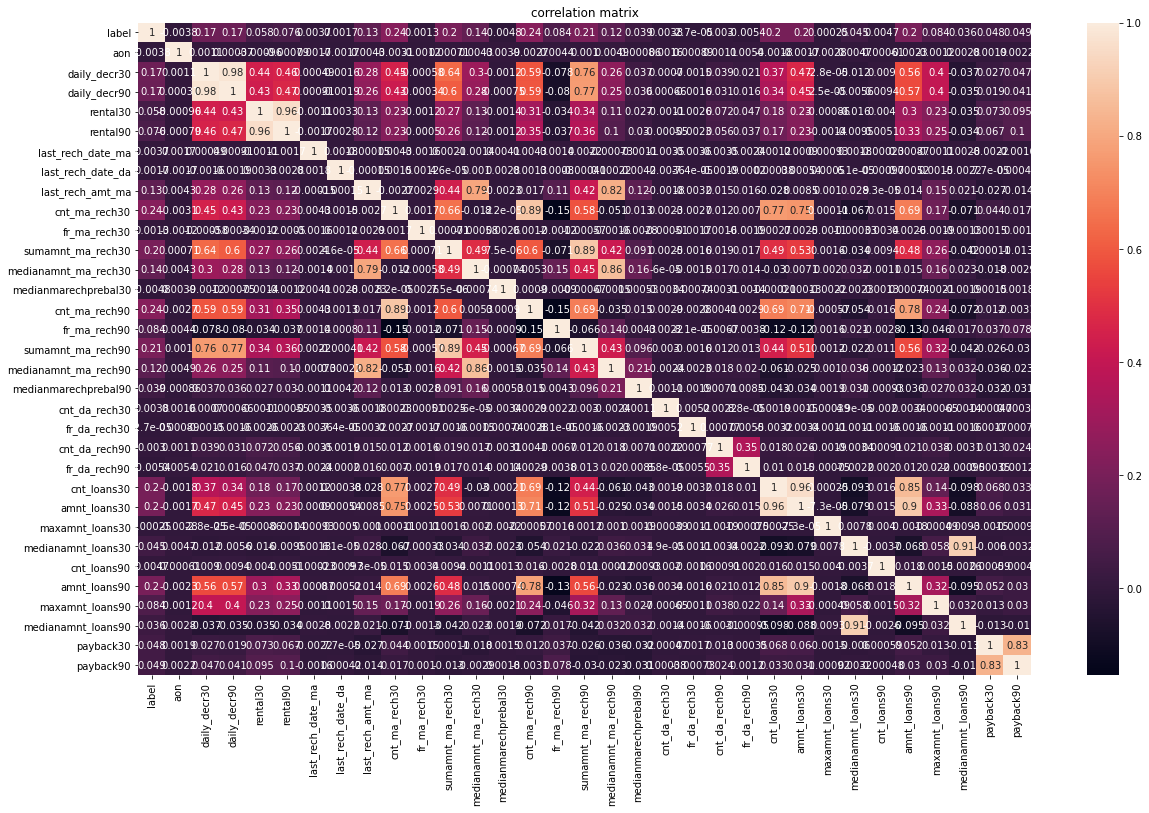

In [17]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None)
import seaborn as sns
corr_mat = df.corr()
plt.figure(figsize = [20,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation matrix")
plt.show()

cnt_ma_rech30 has highest correlation 0.237331 with target variable(label)

fr_da_rech30 has least correlation  -0.000027 with target variable(label)


msisdn, pcircle, pdate attributes Not contributing much to the data set so dropping this column

In [18]:
df = df.drop('msisdn', axis=1)

In [19]:
df = df.drop('pcircle', axis = 1)

In [20]:
df = df.drop('pdate', axis = 1)

In [21]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [22]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

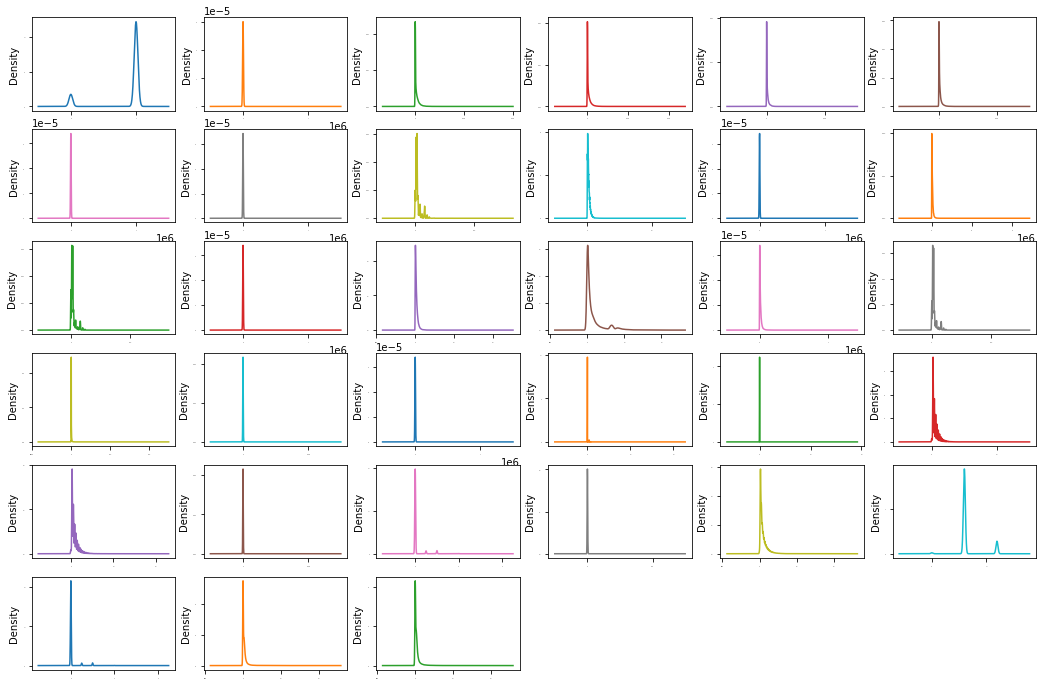

In [23]:
df.plot(kind='density', subplots=True,layout=(6,6),sharex=False, legend=False, fontsize=1, figsize=(18,12),)
plt.show()

In [24]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [25]:
from scipy import stats

In [26]:
def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    #print(data_frame_copy[feature_name])
    if 0 in data_frame_copy[feature_name].unique():
        print('if')
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        #print(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist='norm',plot=plt)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title('log_transform')
        #print(data_frame_copy[feature_name])
        return data_frame_copy[feature_name]

In [27]:
def outliers(data_frame, feature_name):

    '''This function is to remove outliers from the data'''
    
    Q1=data_frame.describe().at['25%',feature_name]
    Q3=data_frame.describe().at['75%',feature_name]
    #print(Q1)
    #print(Q3)
    IQR=Q3 - Q1
    LTV=Q1 - 1.5 * IQR
    UTV=Q3 + 1.5 * IQR
    x=np.array(data_frame[feature_name])
    #print(x)
    p=[]
    for j in x:
        if j < LTV or j>UTV:
            p.append(data_frame[feature_name].median())
            #print(p)
        else:
            p.append(j)
    data_frame[feature_name]=p
    return data_frame[feature_name]


In [28]:
df['aon'].isnull().sum()

0

In [29]:
Power_trans_col=[]
log_col=[]
for i in df.columns:
    if 0 in df[i].unique():
    
        Power_trans_col.append(i)
    else:
    
        log_col.append(i)
        

In [30]:
log_col

['aon']

In [31]:
Power_trans_col

['label',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [32]:
from sklearn.preprocessing import power_transform
x = df.drop(columns=['label'], axis=1)
df_new= power_transform(x) #using power transform to remove skewness
df_new= pd.DataFrame(df_new,columns=x.columns)

In [33]:
df_new.shape

(209593, 32)

In [34]:
df_new.skew()

aon                       1.654517
daily_decr30             -6.582718
daily_decr90             -7.080191
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362530
last_rech_date_da      -106.606657
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90             -0.008988
maxamnt_loans90     

In [35]:
df_new_1 = power_transform(df_new)
df_new_1= pd.DataFrame(df_new_1,columns=x.columns)

In [36]:
df_new_1.skew()

aon                     -1.178085
daily_decr30            -1.881629
daily_decr90            -2.110411
rental30                -8.837902
rental90                -8.390616
last_rech_date_ma        0.858560
last_rech_date_da      -17.770013
last_rech_amt_ma         0.016294
cnt_ma_rech30            0.027247
fr_ma_rech30             0.078270
sumamnt_ma_rech30        0.089057
medianamnt_ma_rech30     0.095486
medianmarechprebal30     0.241723
cnt_ma_rech90            0.019385
fr_ma_rech90             0.053129
sumamnt_ma_rech90        0.054121
medianamnt_ma_rech90     0.037206
medianmarechprebal90     0.654315
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30             -0.079397
amnt_loans30            -0.131656
maxamnt_loans30          0.545064
medianamnt_loans30       3.447735
cnt_loans90             -0.036416
amnt_loans90            -0.116041
maxamnt_loans90         -1.200514
medianamnt_loa

# Outliers Treatment

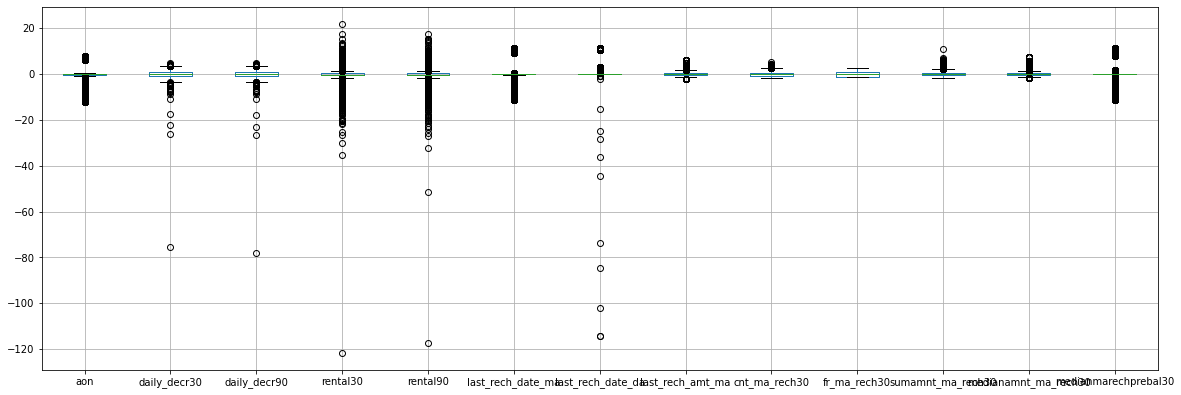

In [37]:
df_new_1.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

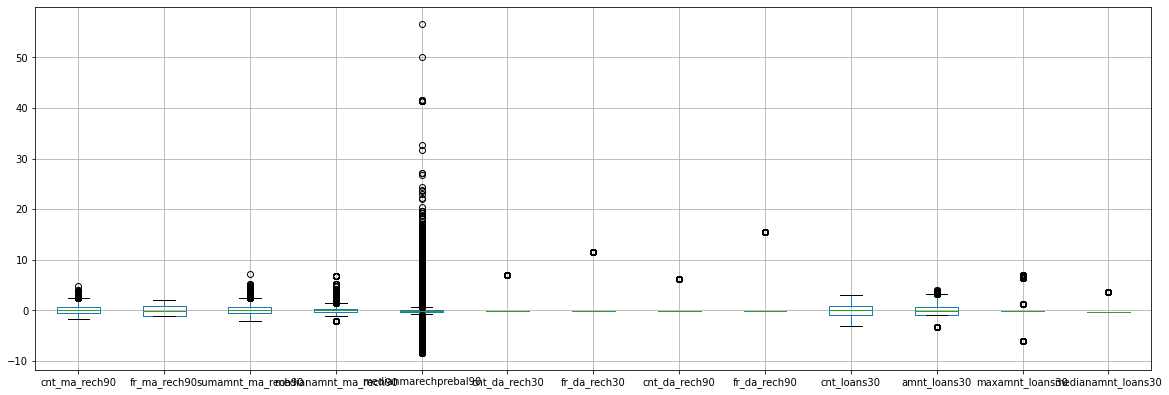

In [38]:
df_new.iloc[:,13:26].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

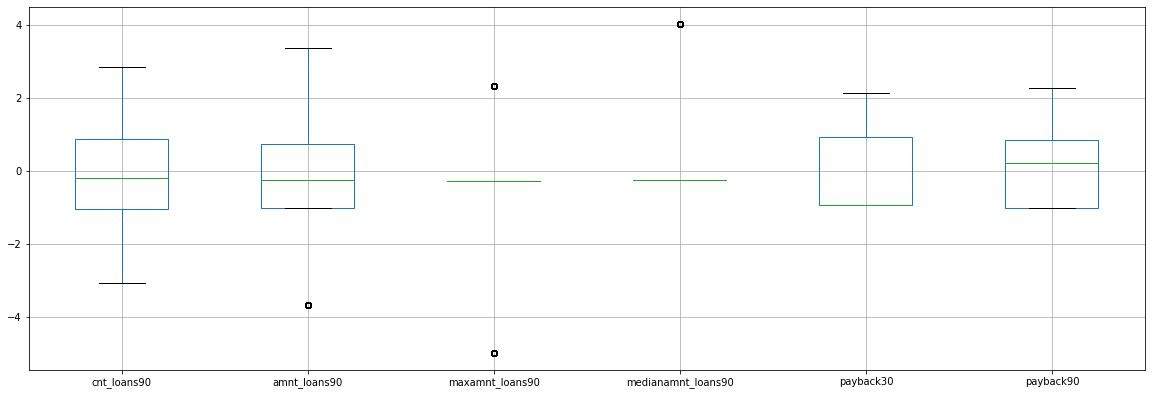

In [39]:
df_new.iloc[:,26:32].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

In [40]:
def outliers(df_new):
    '''To remove outliers from dataset'''
    for i in df_new.describe().columns:
        Q1=df_new.describe().at['25%',i]
        Q3=df_new.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df_new[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df_new[i].median())
            else:
                p.append(j)
        df_new[i]=p
    return df_new

In [41]:
outliers(df_new_1)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.164911,0.303564,0.270727,-0.572913,-0.559851,-0.049085,-0.108789,0.074214,-0.281752,1.544839,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,1.594094,1.657413
1,0.052632,1.140765,1.063219,0.372198,0.182544,0.180558,-0.108789,1.514622,-0.801270,-1.148726,...,-0.911898,-0.079215,-0.130678,-0.269051,-1.041808,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
2,-0.019411,-0.044590,-0.063852,-0.346034,-0.390486,-0.022352,-0.108789,0.074214,-0.801270,-1.148726,...,-0.911898,-0.893478,-0.130678,-0.269051,-1.041808,-1.007981,-0.240404,-0.248272,-0.956500,-1.036536
3,-0.187617,-1.035590,-1.027384,-0.596759,-0.591236,-0.022352,-0.108789,-0.299367,-1.682499,-1.148726,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
4,0.131625,-0.705465,-0.703295,-0.286749,-0.343226,-0.000120,-0.108789,0.442826,0.992781,0.235872,...,1.539106,1.434576,-0.130678,-0.269051,1.167736,1.093307,-0.240404,-0.248272,0.745287,0.500894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.083848,-0.703669,-0.701542,-0.289598,-0.345496,-0.083383,-0.108789,1.053993,0.089411,0.235872,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,0.260299,-0.015258
209589,0.169189,-0.959323,-0.952150,-0.110352,-0.202692,-0.000120,-0.108789,-0.436679,0.379011,-0.195454,...,0.571896,0.408303,-0.130678,-0.269051,0.332824,0.208903,-0.240404,-0.248272,0.260299,-0.015258
209590,0.151392,1.123768,1.050568,0.839835,1.025144,-0.022352,-0.108789,0.074214,0.616556,1.082237,...,0.927000,1.434576,-0.130678,-0.269051,1.035463,1.343824,-0.240404,-0.248272,1.008857,0.792431
209591,0.325385,1.162661,1.088516,-0.503355,-0.370197,-0.049085,-0.108789,-0.436679,0.616556,0.677448,...,0.035793,0.408303,-0.130678,-0.269051,0.332824,0.515921,-0.240404,-0.248272,-0.956500,1.293962


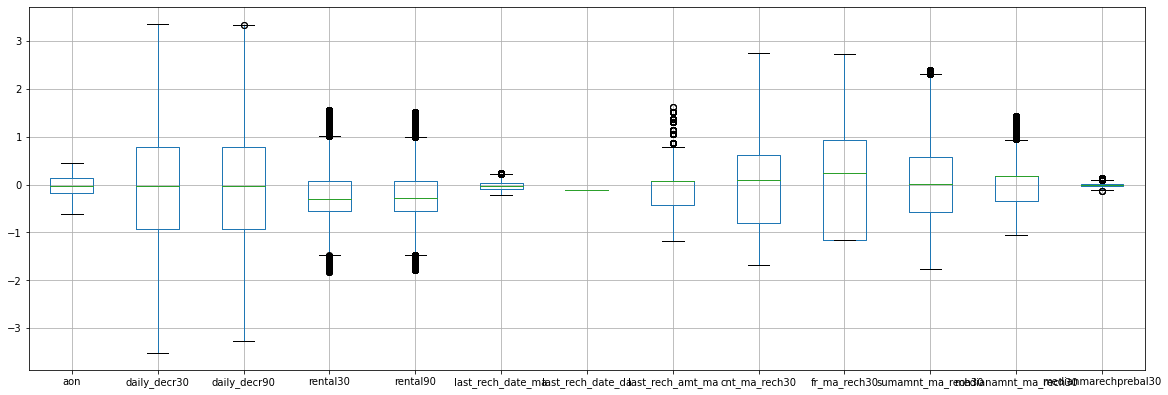

In [42]:
df_new_1.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

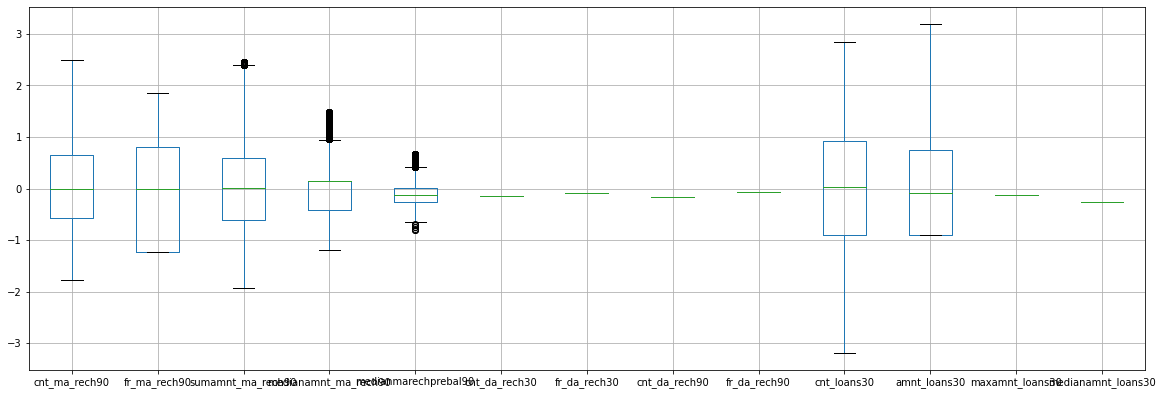

In [43]:
df_new_1.iloc[:,13:26].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

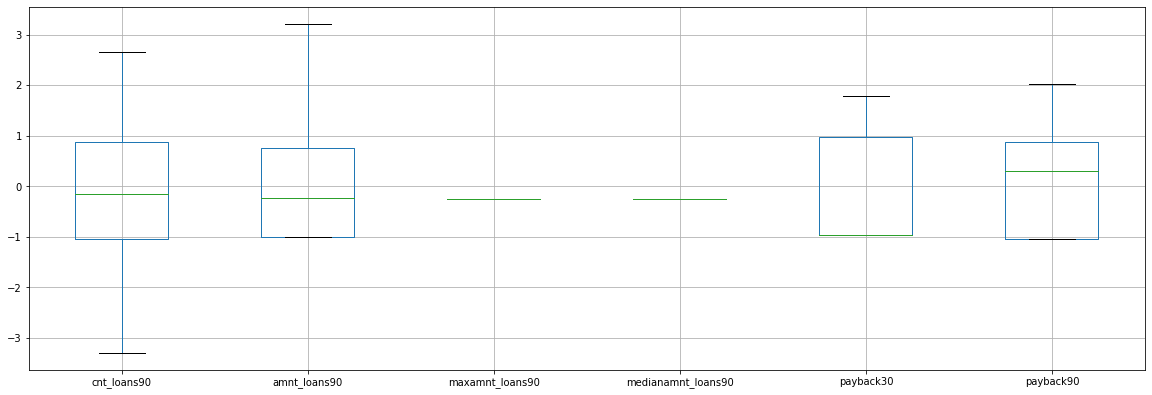

In [44]:
df_new_1.iloc[:,26:32].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

In [45]:
df_new_1

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.164911,0.303564,0.270727,-0.572913,-0.559851,-0.049085,-0.108789,0.074214,-0.281752,1.544839,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,1.594094,1.657413
1,0.052632,1.140765,1.063219,0.372198,0.182544,0.180558,-0.108789,1.514622,-0.801270,-1.148726,...,-0.911898,-0.079215,-0.130678,-0.269051,-1.041808,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
2,-0.019411,-0.044590,-0.063852,-0.346034,-0.390486,-0.022352,-0.108789,0.074214,-0.801270,-1.148726,...,-0.911898,-0.893478,-0.130678,-0.269051,-1.041808,-1.007981,-0.240404,-0.248272,-0.956500,-1.036536
3,-0.187617,-1.035590,-1.027384,-0.596759,-0.591236,-0.022352,-0.108789,-0.299367,-1.682499,-1.148726,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
4,0.131625,-0.705465,-0.703295,-0.286749,-0.343226,-0.000120,-0.108789,0.442826,0.992781,0.235872,...,1.539106,1.434576,-0.130678,-0.269051,1.167736,1.093307,-0.240404,-0.248272,0.745287,0.500894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.083848,-0.703669,-0.701542,-0.289598,-0.345496,-0.083383,-0.108789,1.053993,0.089411,0.235872,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,0.260299,-0.015258
209589,0.169189,-0.959323,-0.952150,-0.110352,-0.202692,-0.000120,-0.108789,-0.436679,0.379011,-0.195454,...,0.571896,0.408303,-0.130678,-0.269051,0.332824,0.208903,-0.240404,-0.248272,0.260299,-0.015258
209590,0.151392,1.123768,1.050568,0.839835,1.025144,-0.022352,-0.108789,0.074214,0.616556,1.082237,...,0.927000,1.434576,-0.130678,-0.269051,1.035463,1.343824,-0.240404,-0.248272,1.008857,0.792431
209591,0.325385,1.162661,1.088516,-0.503355,-0.370197,-0.049085,-0.108789,-0.436679,0.616556,0.677448,...,0.035793,0.408303,-0.130678,-0.269051,0.332824,0.515921,-0.240404,-0.248272,-0.956500,1.293962


In [46]:

x= df_new_1
y=df['label']

In [47]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.164911,0.303564,0.270727,-0.572913,-0.559851,-0.049085,-0.108789,0.074214,-0.281752,1.544839,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,1.594094,1.657413
1,0.052632,1.140765,1.063219,0.372198,0.182544,0.180558,-0.108789,1.514622,-0.801270,-1.148726,...,-0.911898,-0.079215,-0.130678,-0.269051,-1.041808,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
2,-0.019411,-0.044590,-0.063852,-0.346034,-0.390486,-0.022352,-0.108789,0.074214,-0.801270,-1.148726,...,-0.911898,-0.893478,-0.130678,-0.269051,-1.041808,-1.007981,-0.240404,-0.248272,-0.956500,-1.036536
3,-0.187617,-1.035590,-1.027384,-0.596759,-0.591236,-0.022352,-0.108789,-0.299367,-1.682499,-1.148726,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
4,0.131625,-0.705465,-0.703295,-0.286749,-0.343226,-0.000120,-0.108789,0.442826,0.992781,0.235872,...,1.539106,1.434576,-0.130678,-0.269051,1.167736,1.093307,-0.240404,-0.248272,0.745287,0.500894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.083848,-0.703669,-0.701542,-0.289598,-0.345496,-0.083383,-0.108789,1.053993,0.089411,0.235872,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,0.260299,-0.015258
209589,0.169189,-0.959323,-0.952150,-0.110352,-0.202692,-0.000120,-0.108789,-0.436679,0.379011,-0.195454,...,0.571896,0.408303,-0.130678,-0.269051,0.332824,0.208903,-0.240404,-0.248272,0.260299,-0.015258
209590,0.151392,1.123768,1.050568,0.839835,1.025144,-0.022352,-0.108789,0.074214,0.616556,1.082237,...,0.927000,1.434576,-0.130678,-0.269051,1.035463,1.343824,-0.240404,-0.248272,1.008857,0.792431
209591,0.325385,1.162661,1.088516,-0.503355,-0.370197,-0.049085,-0.108789,-0.436679,0.616556,0.677448,...,0.035793,0.408303,-0.130678,-0.269051,0.332824,0.515921,-0.240404,-0.248272,-0.956500,1.293962


In [48]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [49]:
#null_treated(df)

In [50]:
df_new_1['label'] = y
df_new_1.corr()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
aon,1.000000e+00,9.498557e-02,9.603334e-02,4.954270e-02,5.452722e-02,6.012957e-02,-6.554071e-15,3.273351e-02,2.453753e-02,5.704246e-02,...,6.650376e-02,-6.397935e-15,6.313458e-15,9.461818e-02,9.822927e-02,6.462995e-15,6.569349e-15,6.836687e-02,9.617262e-02,8.881985e-02
daily_decr30,9.498557e-02,1.000000e+00,9.953013e-01,4.856981e-01,5.344636e-01,1.055965e-01,-2.475086e-17,1.495106e-01,4.905099e-01,2.802131e-01,...,4.852268e-01,-2.126789e-16,-8.382577e-18,4.794094e-01,5.990417e-01,4.564614e-17,2.894692e-16,3.299606e-01,3.940675e-01,2.450840e-01
daily_decr90,9.603334e-02,9.953013e-01,1.000000e+00,4.835092e-01,5.371744e-01,1.076922e-01,1.098710e-16,1.468387e-01,4.831470e-01,2.787196e-01,...,4.790220e-01,-1.082520e-17,-1.311330e-16,4.796007e-01,6.015447e-01,5.233223e-17,-1.757678e-16,3.257127e-01,3.940088e-01,2.472896e-01
rental30,4.954270e-02,4.856981e-01,4.835092e-01,1.000000e+00,8.616785e-01,1.751670e-02,1.496013e-13,6.033678e-02,3.281456e-01,1.640739e-01,...,3.012555e-01,1.494036e-13,-1.494684e-13,2.918466e-01,3.529434e-01,-1.496613e-13,-1.496844e-13,2.296434e-01,2.558820e-01,7.549510e-02
rental90,5.452722e-02,5.344636e-01,5.371744e-01,8.616785e-01,1.000000e+00,3.929809e-02,-1.140826e-14,6.223900e-02,3.195368e-01,1.671325e-01,...,3.005237e-01,-1.146463e-14,1.131069e-14,3.016580e-01,3.719473e-01,1.118388e-14,1.120941e-14,2.255137e-01,2.672768e-01,8.205536e-02
last_rech_date_ma,6.012957e-02,1.055965e-01,1.076922e-01,1.751670e-02,3.929809e-02,1.000000e+00,-5.303269e-14,1.250606e-01,-9.428629e-03,5.017085e-02,...,-1.032468e-01,-5.324960e-14,5.274130e-14,-5.538953e-02,-5.203354e-02,5.318049e-14,5.185219e-14,-1.265463e-01,-4.063086e-02,3.919889e-02
last_rech_date_da,-6.554071e-15,-2.475086e-17,1.098710e-16,1.496013e-13,-1.140826e-14,-5.303269e-14,1.000000e+00,1.538599e-13,2.128273e-15,-1.005201e-15,...,-5.482293e-14,1.000000e+00,-1.000000e+00,-6.900098e-16,5.415686e-15,-1.000000e+00,-1.000000e+00,4.144758e-16,-1.336322e-15,2.507609e-16
last_rech_amt_ma,3.273351e-02,1.495106e-01,1.468387e-01,6.033678e-02,6.223900e-02,1.250606e-01,1.538599e-13,1.000000e+00,-5.496626e-02,2.512202e-02,...,8.487074e-04,1.529817e-13,-1.543329e-13,-1.557456e-02,7.772440e-03,-1.519230e-13,-1.541764e-13,-3.235798e-02,-1.837558e-02,3.671566e-02
cnt_ma_rech30,2.453753e-02,4.905099e-01,4.831470e-01,3.281456e-01,3.195368e-01,-9.428629e-03,2.128273e-15,-5.496626e-02,1.000000e+00,4.493043e-01,...,7.394801e-01,4.860705e-15,-5.707620e-15,6.697856e-01,7.193488e-01,-5.411747e-15,-5.698702e-15,5.728641e-01,5.098316e-01,3.445828e-01
fr_ma_rech30,5.704246e-02,2.802131e-01,2.787196e-01,1.640739e-01,1.671325e-01,5.017085e-02,-1.005201e-15,2.512202e-02,4.493043e-01,1.000000e+00,...,3.258432e-01,-5.636171e-16,5.565238e-16,3.463473e-01,3.524476e-01,-4.101109e-17,6.529188e-16,4.241129e-01,4.041268e-01,2.473496e-01


Separating Independent variable and Target variable

In [51]:
x= df_new_1.drop(['label'], axis=1)
y=df['label']

In [52]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.164911,0.303564,0.270727,-0.572913,-0.559851,-0.049085,-0.108789,0.074214,-0.281752,1.544839,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,1.594094,1.657413
1,0.052632,1.140765,1.063219,0.372198,0.182544,0.180558,-0.108789,1.514622,-0.801270,-1.148726,...,-0.911898,-0.079215,-0.130678,-0.269051,-1.041808,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
2,-0.019411,-0.044590,-0.063852,-0.346034,-0.390486,-0.022352,-0.108789,0.074214,-0.801270,-1.148726,...,-0.911898,-0.893478,-0.130678,-0.269051,-1.041808,-1.007981,-0.240404,-0.248272,-0.956500,-1.036536
3,-0.187617,-1.035590,-1.027384,-0.596759,-0.591236,-0.022352,-0.108789,-0.299367,-1.682499,-1.148726,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
4,0.131625,-0.705465,-0.703295,-0.286749,-0.343226,-0.000120,-0.108789,0.442826,0.992781,0.235872,...,1.539106,1.434576,-0.130678,-0.269051,1.167736,1.093307,-0.240404,-0.248272,0.745287,0.500894


In [53]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   209593 non-null  float64
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  float64
 8   cnt_ma_rech30         209593 non-null  float64
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  medianmarechprebal30  209593 non-null  float64
 13  cnt_ma_rech90         209593 non-null  float64
 14  fr_ma_rech90          209593 non-null  float64
 15  

# Feature Engineering

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x, y) 
print(("Num Features: %d") % fit.n_features_ )
print(("Selected Features: %s") % fit.support_) 
print(("Feature Ranking: %s") % fit.ranking_)

Num Features: 10
Selected Features: [ True  True  True False  True  True False False False False False False
  True False False  True False False False False False False  True  True
 False False False  True False False False False]
Feature Ranking: [ 1  1  1 11  1  1 13 19 12 23  6 21  1  5 18  1 20  7  9 14  8 15  1  1
 10  2 22  1  4  3 16 17]


In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)


[0.08052497 0.12627301 0.12838528 0.07453656 0.07358416 0.04956416
 0.         0.02014483 0.027559   0.02368267 0.04002571 0.01738627
 0.0429158  0.03246909 0.0319226  0.05044409 0.02119537 0.04996615
 0.         0.         0.         0.         0.01138886 0.02121745
 0.         0.         0.01547319 0.02060745 0.         0.
 0.02022855 0.0205048 ]


SL  COL_NAME                         LRR    EXTRATREE        

 0  aon                                1    0.08062165 (3)  
    
 1  daily_decr30                       1    0.12756659 (1)  

 2  daily_decr90                       1    0.12245571 (2)   
    
 3  rental30                           11   0.07493403 (4)   

 4  rental90                           1    0.07352749 (5)  
    
 5 last_rech_date_ma                   1    0.04645208 (8)   

 6 last_rech_date_da                   13   0               
    
 7 last_rech_amt_ma                    19   0.02041122 (19)  

 8 cnt_ma_rech30                       12   0.03016936 (13)  
    
 9 fr_ma_rech30                        23   0.02397437 (14)  

 10 sumamnt_ma_rech30                  6    0.03423462 (12)  
    
 11 medianamnt_ma_rech30               21   0.01783018 (20) 

 12 medianmarechprebal30               1    0.04483538 (9)  
    
 13 cnt_ma_rech90                      5    0.03692062 (11)  

 14 fr_ma_rech90                       18   0.03693816 (10)  
    
 15 sumamnt_ma_rech90                  1    0.05066226 (6)   

 16 medianamnt_ma_rech90               20   0.02171036 (18) 
    
 17 medianmarechprebal90               7    0.04710063 (7)   

 18 cnt_da_rech30                      9    0                
    
 19 fr_da_rech30                       14   0               

 20 cnt_da_rech90                      8    0               
    
 21 fr_da_rech90                       15   0              

 22 cnt_loans30                        1    0.01012719 (23)  
    
 23 amnt_loans30                       1    0.01749195 (21)  

 24 maxamnt_loans30                    10   0               
    
 25 medianamnt_loans30                 2    0                

 26 cnt_loans90                        22   0.0144475 (22)  
    
 27 amnt_loans90                       1    0.02252567 (16)  

 28 maxamnt_loans90                    4    0                
    
 29 medianamnt_loans90                 3    0                

 30 payback30                          16   0.02224678 (17)  
    
 31 payback90                          17   0.02281619 (15)  


In [56]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.164911,0.303564,0.270727,-0.572913,-0.559851,-0.049085,-0.108789,0.074214,-0.281752,1.544839,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,1.594094,1.657413
1,0.052632,1.140765,1.063219,0.372198,0.182544,0.180558,-0.108789,1.514622,-0.801270,-1.148726,...,-0.911898,-0.079215,-0.130678,-0.269051,-1.041808,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
2,-0.019411,-0.044590,-0.063852,-0.346034,-0.390486,-0.022352,-0.108789,0.074214,-0.801270,-1.148726,...,-0.911898,-0.893478,-0.130678,-0.269051,-1.041808,-1.007981,-0.240404,-0.248272,-0.956500,-1.036536
3,-0.187617,-1.035590,-1.027384,-0.596759,-0.591236,-0.022352,-0.108789,-0.299367,-1.682499,-1.148726,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,-0.956500,-1.036536
4,0.131625,-0.705465,-0.703295,-0.286749,-0.343226,-0.000120,-0.108789,0.442826,0.992781,0.235872,...,1.539106,1.434576,-0.130678,-0.269051,1.167736,1.093307,-0.240404,-0.248272,0.745287,0.500894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.083848,-0.703669,-0.701542,-0.289598,-0.345496,-0.083383,-0.108789,1.053993,0.089411,0.235872,...,0.035793,-0.079215,-0.130678,-0.269051,-0.152988,-0.234887,-0.240404,-0.248272,0.260299,-0.015258
209589,0.169189,-0.959323,-0.952150,-0.110352,-0.202692,-0.000120,-0.108789,-0.436679,0.379011,-0.195454,...,0.571896,0.408303,-0.130678,-0.269051,0.332824,0.208903,-0.240404,-0.248272,0.260299,-0.015258
209590,0.151392,1.123768,1.050568,0.839835,1.025144,-0.022352,-0.108789,0.074214,0.616556,1.082237,...,0.927000,1.434576,-0.130678,-0.269051,1.035463,1.343824,-0.240404,-0.248272,1.008857,0.792431
209591,0.325385,1.162661,1.088516,-0.503355,-0.370197,-0.049085,-0.108789,-0.436679,0.616556,0.677448,...,0.035793,0.408303,-0.130678,-0.269051,0.332824,0.515921,-0.240404,-0.248272,-0.956500,1.293962


Droping columns according to Feature engineering

Selecting top ten columns from Extratree Classifier and droping remaining columns as they are not contributing much to target variable

In [57]:
x= x.drop(columns = [ 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90',
      'medianamnt_ma_rech90', 'cnt_da_rech30','fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], axis =1)

In [58]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,medianmarechprebal30,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90
0,-0.164911,0.303564,0.270727,-0.572913,-0.559851,-0.049085,-0.042641,1.305718,-0.472571,-0.316306
1,0.052632,1.140765,1.063219,0.372198,0.182544,0.180558,0.015588,-1.235088,-0.127355,0.022509
2,-0.019411,-0.044590,-0.063852,-0.346034,-0.390486,-0.022352,0.019428,-1.235088,-0.776566,0.049772
3,-0.187617,-1.035590,-1.027384,-0.596759,-0.591236,-0.022352,-0.065305,-1.235088,-0.952658,-0.364463
4,0.131625,-0.705465,-0.703295,-0.286749,-0.343226,-0.000120,-0.012520,-0.013467,0.980969,-0.123195
...,...,...,...,...,...,...,...,...,...,...
209588,-0.083848,-0.703669,-0.701542,-0.289598,-0.345496,-0.083383,0.036131,-0.013467,0.270668,0.173863
209589,0.169189,-0.959323,-0.952150,-0.110352,-0.202692,-0.000120,0.072376,-0.013467,-0.333231,0.264372
209590,0.151392,1.123768,1.050568,0.839835,1.025144,-0.022352,0.007905,0.544222,0.755740,-0.052654
209591,0.325385,1.162661,1.088516,-0.503355,-0.370197,-0.049085,0.073606,0.410241,0.723027,0.211564


Finding best random state by using LogisticRegression

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
Max_acc = 0
Max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predir = LR.predict(x_test)
    acc_score = accuracy_score(y_test, predir)
    if acc_score> Max_acc:
        Max_acc = acc_score
        Max_rs = i
print("best acc is", Max_acc, "on random state", Max_rs) 

best acc is 0.8868125576513248 on random state 170


As data is imbalanced we are sampling the data using SMOTE function

In [60]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [61]:
x, y=smote.fit_sample(x,y)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=170)

In [63]:
x_train.shape,y_train.shape,x_test.shape

((293489, 10), (293489,), (73373, 10))

# Model Building

In [64]:
# Train test split for Algorithms
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    model.fit(x_train, y_train)
    preddt = model.predict(x_test)
    print("Confusion Matrix --------> ",name,"------>",accuracy_score(y_test, preddt))
    print(confusion_matrix(y_test, preddt),name)
    print(classification_report(y_test, preddt),name)
    names.append(name)
    
# boxplot algorithm comparison
#fig = pyplot.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
#pyplot.boxplot(results)
#ax.set_xticklabels(names)
#pyplot.show()

Confusion Matrix -------->  LR ------> 0.7630190942172189
[[28227  8291]
 [ 9097 27758]] LR
              precision    recall  f1-score   support

           0       0.76      0.77      0.76     36518
           1       0.77      0.75      0.76     36855

    accuracy                           0.76     73373
   macro avg       0.76      0.76      0.76     73373
weighted avg       0.76      0.76      0.76     73373
 LR
Confusion Matrix -------->  KNN ------> 0.8852711487877012
[[35913   605]
 [ 7813 29042]] KNN
              precision    recall  f1-score   support

           0       0.82      0.98      0.90     36518
           1       0.98      0.79      0.87     36855

    accuracy                           0.89     73373
   macro avg       0.90      0.89      0.88     73373
weighted avg       0.90      0.89      0.88     73373
 KNN
Confusion Matrix -------->  CART ------> 0.8967195017240674
[[33069  3449]
 [ 4129 32726]] CART
              precision    recall  f1-score   support

  

In [65]:
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier()
scr = cross_val_score(dt, x, y, cv=5)
print("cross validation score of Decision Tree model : ", scr.mean())

cross validation score of Decision Tree model :  0.8939957382441241


# AOC ROC Curve for DecisionTreeClassifier

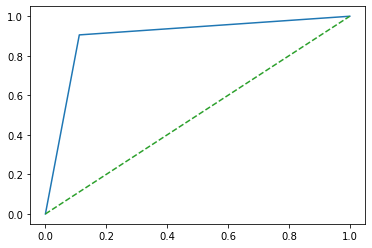

In [66]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
fpr, tpr, thresholds = roc_curve(preddt,y_test)  
roc_auc=auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

# Hyper Parameter tuning for DecisionTreeClassifier

In [67]:
param_dict= {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}
param_dict

{'criterion': ['gini', 'entropy'],
 'max_depth': range(1, 10),
 'min_samples_split': range(2, 10),
 'min_samples_leaf': range(1, 5)}

In [68]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dt,
                  param_grid=param_dict,
                  cv=10,
                  verbose=1,
                  n_jobs=-1)
grid.fit(x_train,y_train)


Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 47.5min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [69]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [70]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [71]:
grid.best_score_

0.8145654516324861

# AOC ROC Curve after Hyper Parameter tuning 

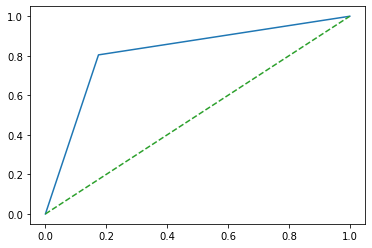

In [72]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=9, min_samples_split=6,min_samples_leaf=3,criterion = 'entropy')
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
fpr, tpr, thresholds = roc_curve(preddt,y_test)  
roc_auc=auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

In [73]:
# Scaling 

In [74]:
def std_scalar(df):
    '''This function is to apply Standard Scalar on the given data and return scaled dataset'''
    from sklearn.preprocessing import StandardScaler
    for i in df.columns:
        le=StandardScaler()
        le.fit(df[i].values.reshape(-1, 1))
        x=le.transform(df[i].values.reshape(-1, 1))
        df[i]=x
    return df

In [75]:
std_scalar(x)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,medianmarechprebal30,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90
0,-0.642515,0.617189,0.589005,-0.716617,-0.702386,-0.343608,-0.588835,1.498263,-0.046504,-0.738201
1,0.465365,1.515009,1.445544,1.126433,0.799030,2.100812,0.746222,-0.937371,0.294974,0.780999
2,0.098472,0.243827,0.227386,-0.274182,-0.359864,-0.059046,0.834283,-0.937371,-0.347206,0.903243
3,-0.758152,-0.818928,-0.814015,-0.763119,-0.765859,-0.059046,-1.108472,-0.937371,-0.521392,-0.954128
4,0.867656,-0.464900,-0.463735,-0.158572,-0.264285,0.177600,0.101773,0.233682,1.391297,0.127684
...,...,...,...,...,...,...,...,...,...,...
366857,-0.825686,0.913810,0.871761,-0.444860,-0.425112,1.651154,-0.169047,-0.937371,-0.433410,-0.270402
366858,0.248166,-1.097447,-1.093383,-0.870506,-0.856231,-0.059046,-0.867372,-0.937371,-0.345198,-0.943575
366859,1.964068,1.247738,1.205891,-1.329871,-2.868942,1.006325,0.802100,1.210236,1.976871,0.154734
366860,-0.378495,-0.014126,-0.022836,-0.179025,-0.272682,-1.247177,-1.108472,-0.937371,-1.481179,-1.092723


LR 0.7248720249335865 0.01128798669474942
KNN 0.8547141395235546 0.07447047873214915
NB 0.7006668513847978 0.020075429799213042


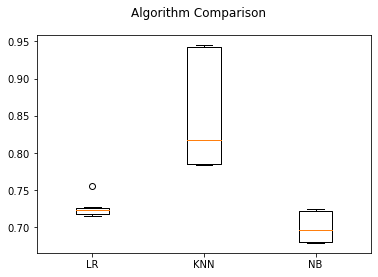

In [76]:
#Compare Algorithms
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# Already loaded earlier
#array = data.values
#X = array[:,0:8]
#Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# AOC ROC Curve for LogisticRegression

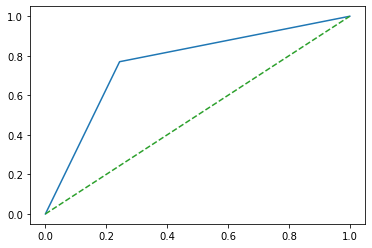

In [77]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
dl = LogisticRegression()
dl.fit(x_train, y_train)
preddt = dl.predict(x_test)
fpr, tpr, thresholds = roc_curve(preddt,y_test)  
roc_auc=auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

# AOC ROC Curve for KNeighborsClassifier

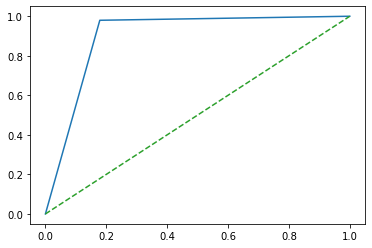

In [78]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
dk = KNeighborsClassifier()
dk.fit(x_train, y_train)
preddt = dk.predict(x_test)
fpr, tpr, thresholds = roc_curve(preddt,y_test)  
roc_auc=auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

# Hyper parameter tuning for LogisticRegression

In [79]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=32)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.759457 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.759425 (0.001991) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759425 (0.001989) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.759425 (0.001989) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.759435 (0.001981) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759433 (0.001984) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.759433 (0.001981) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.759453 (0.001959) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759455 (0.001960) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.759457 (0.001957) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.759411 (0.001950) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759408 (0.001951) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.759407 (0.001956) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.758632 (0.001874) wit

# Conclusion:

Based on Hyper Parameter Tuning, AUC ROC Curve and other methods we can understand DecisionTree Classifier gives us the best accuracy (81.45) in prediction.
